In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv(r"C:\Users\lenovo\Downloads\train.csv")
test = pd.read_csv(r"C:\Users\lenovo\Downloads\tested.csv")

In [3]:
train = pd.DataFrame(train)
test = pd.DataFrame(test)
len(train)

891

In [4]:
desc_df = pd.DataFrame({"Column_Names":train.columns,"First_Value":train.loc[0]})

In [5]:
desc_df

,Column_Names,First_Value
PassengerId,PassengerId,1
Survived,Survived,0
Pclass,Pclass,3
Name,Name,"Braund, Mr. Owen Harris"
Sex,Sex,male
Age,Age,22.0
SibSp,SibSp,1
Parch,Parch,0
Ticket,Ticket,A/5 21171
Fare,Fare,7.25


In [6]:
train.PassengerId.nunique()

891

In [7]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
train['Name'].nunique()

891

In [10]:
train['Sex'].nunique()

2

In [11]:
train['Age'].dtype

dtype('float64')

In [12]:
train.SibSp.nunique()

7

In [13]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [14]:
train['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [15]:
train['Ticket'].value_counts()

1601                 7
347082               7
CA. 2343             7
3101295              6
347088               6
                    ..
STON/O 2. 3101294    1
A/5 21173            1
113059               1
330958               1
SC/PARIS 2167        1
Name: Ticket, Length: 681, dtype: int64

In [16]:
train['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
D              3
F33            3
              ..
B30            1
D21            1
A20            1
D11            1
C7             1
Name: Cabin, Length: 147, dtype: int64

In [17]:
train.isnull().sum(axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
train.drop(["Name","Cabin",'PassengerId','Ticket',"Parch"],axis = 1,inplace = True)

In [19]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [20]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
sex_dict = {"male":0,"female":1}
embark_dict = {"C":1,"Q":2,"S" :3,"E":0}

In [22]:
train.Embarked.fillna("E",inplace = True)
train.Embarked.replace(embark_dict,inplace = True)
train.Sex.replace(sex_dict,inplace = True)
train["Embarked"].astype("category")

0      3
1      1
2      3
3      3
4      3
      ..
886    3
887    3
888    3
889    1
890    2
Name: Embarked, Length: 891, dtype: category
Categories (4, int64): [0, 1, 2, 3]

In [23]:
train.Embarked.value_counts()

3    644
1    168
2     77
0      2
Name: Embarked, dtype: int64

In [24]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,0,22.0,1,7.2500,3
1,1,1,1,38.0,1,71.2833,1
2,1,3,1,26.0,0,7.9250,3
3,1,1,1,35.0,1,53.1000,3
4,0,3,0,35.0,0,8.0500,3


In [25]:
train.Age.fillna(train.Age.mean(),inplace = True)

In [26]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,0,22.0,1,7.2500,3
1,1,1,1,38.0,1,71.2833,1
2,1,3,1,26.0,0,7.9250,3
3,1,1,1,35.0,1,53.1000,3
4,0,3,0,35.0,0,8.0500,3


In [27]:
train.isnull().sum(axis = 0)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
Embarked    0
dtype: int64

In [28]:
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,32.204208,2.529742
std,0.486592,0.836071,0.477990,13.002015,1.102743,49.693429,0.800254
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,7.910400,2.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,14.454200,3.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,31.000000,3.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,512.329200,3.000000


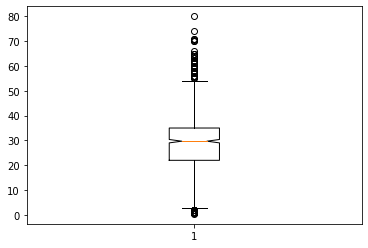

In [29]:
plt.boxplot(train.Age,"ro")
plt.show()

In [30]:
IQR = train.quantile(0.75)-train.quantile(0.25)
L_Wishker = train.quantile(0.25)-1.5*IQR
U_Wishker = train.quantile(0.75)+1.5*IQR

In [31]:
L_Wishker

Survived    -1.500
Pclass       0.500
Sex         -1.500
Age          2.500
SibSp       -1.500
Fare       -26.724
Embarked     0.500
dtype: float64

In [32]:
U_Wishker

Survived     2.5000
Pclass       4.5000
Sex          2.5000
Age         54.5000
SibSp        2.5000
Fare        65.6344
Embarked     4.5000
dtype: float64

In [33]:
train.loc[train['Age']<L_Wishker["Age"],"Age"] = L_Wishker["Age"]
train.loc[train['Age']>U_Wishker["Age"],"Age"] = U_Wishker["Age"]

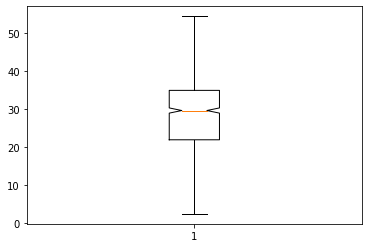

In [34]:
plt.boxplot(train.Age,"ro")
plt.show()

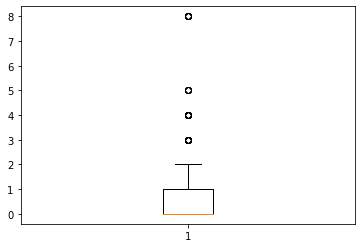

In [35]:
plt.boxplot(train["SibSp"])
plt.show()

In [36]:
train.loc[train['SibSp']<L_Wishker["SibSp"],"SibSp"]=L_Wishker["SibSp"]
train.loc[train['SibSp']>U_Wishker["SibSp"],"SibSp"]=U_Wishker["SibSp"]

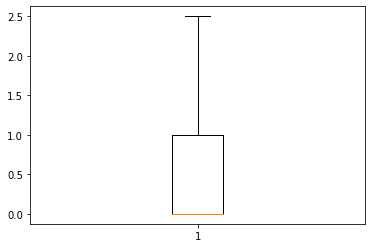

In [37]:
#train['SibSp'] = train['SibSp'].astype("category")
plt.boxplot(train["SibSp"])
plt.show()

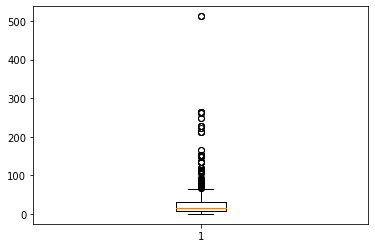

In [38]:
plt.boxplot(train["Fare"])
plt.show()

In [39]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,0,22.0,1.0,7.2500,3
1,1,1,1,38.0,1.0,71.2833,1
2,1,3,1,26.0,0.0,7.9250,3
3,1,1,1,35.0,1.0,53.1000,3
4,0,3,0,35.0,0.0,8.0500,3


In [40]:
train.loc[train["Fare"]<L_Wishker["Fare"],"Fare"] = L_Wishker["Fare"]
train.loc[train['Fare']>U_Wishker["Fare"],"Fare"] = U_Wishker["Fare"]

In [41]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,0,22.0,1.0,7.2500,3
1,1,1,1,38.0,1.0,65.6344,1
2,1,3,1,26.0,0.0,7.9250,3
3,1,1,1,35.0,1.0,53.1000,3
4,0,3,0,35.0,0.0,8.0500,3


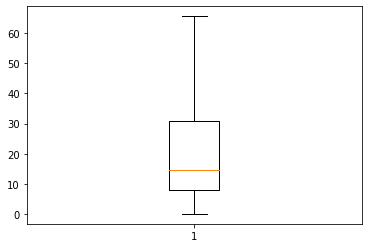

In [42]:
plt.boxplot(train["Fare"])
plt.show()

In [43]:
age_bin = [0,11,22,33,44,55]
age_label = [0,1,2,3,4]
train["Age"] = pd.cut(train["Age"],age_bin,labels = age_label)

In [44]:
fare_bin = [0,11,22,33,44,55,66]
fare_label = [0,1,2,3,4,5]
train["Fare"] = pd.cut(train["Fare"],fare_bin,labels = fare_label)

In [45]:
correlation_p = train.corr("pearson")

In [46]:
correlation_s = train.corr('spearman')

In [47]:
correlation_p

,Survived,Pclass,Sex,SibSp,Embarked
Survived,1.000000,-0.338481,0.543351,0.031434,-0.176509
Pclass,-0.338481,1.000000,-0.131900,0.023180,0.173511
Sex,0.543351,-0.131900,1.000000,0.167885,-0.118492
SibSp,0.031434,0.023180,0.167885,1.000000,0.043015
Embarked,-0.176509,0.173511,-0.118492,0.043015,1.000000


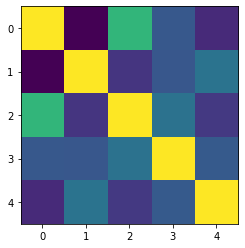

In [48]:
plt.imshow(correlation_p)

In [49]:
for col in train.columns:
    print(col , " : ")
    print(train[col].value_counts())

Survived  : 
0    549
1    342
Name: Survived, dtype: int64
Pclass  : 
3    491
1    216
2    184
Name: Pclass, dtype: int64
Sex  : 
0    577
1    314
Name: Sex, dtype: int64
Age  : 
2    409
1    163
3    136
4    115
0     68
Name: Age, dtype: int64
SibSp  : 
0.0    608
1.0    209
2.5     46
2.0     28
Name: SibSp, dtype: int64
Fare  : 
0    349
1    171
2    150
5    139
3     35
4     32
Name: Fare, dtype: int64
Embarked  : 
3    644
1    168
2     77
0      2
Name: Embarked, dtype: int64


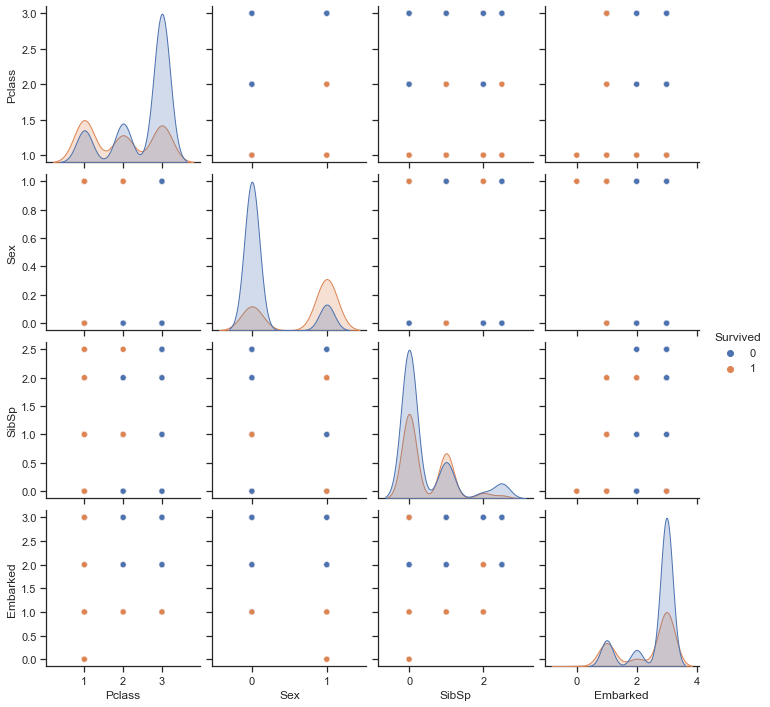

In [50]:
sns.set_theme(style="ticks")
sns.pairplot(train,hue="Survived")

In [51]:
train

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,0,1,1.0,0,3
1,1,1,1,3,1.0,5,1
2,1,3,1,2,0.0,0,3
3,1,1,1,3,1.0,4,3
4,0,3,0,3,0.0,0,3
...,...,...,...,...,...,...,...
886,0,2,0,2,0.0,1,3
887,1,1,1,1,0.0,2,3
888,0,3,1,2,1.0,2,3
889,1,1,0,2,0.0,2,1


In [52]:
from pycaret.classification import *
clf = setup(data = train,target = "Survived",session_id = 123,train_size = 0.8,fold = 10,silent=True)

,Description,Value
0,session_id,123
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(891, 7)"
5,Missing Values,True
6,Numeric Features,1
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [53]:
#model = create_model("catboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8194,0.7845,0.6429,0.8571,0.7347,0.6020,0.6164
1,0.8333,0.8608,0.7500,0.8077,0.7778,0.6447,0.6459
2,0.8310,0.8567,0.6786,0.8636,0.7600,0.6324,0.6434
3,0.8028,0.8771,0.7500,0.7500,0.7500,0.5872,0.5872
4,0.7606,0.7990,0.6429,0.7200,0.6792,0.4892,0.4912
5,0.7887,0.8754,0.6429,0.7826,0.7059,0.5435,0.5499
6,0.8169,0.8883,0.7143,0.8000,0.7547,0.6094,0.6119
7,0.8169,0.8880,0.5926,0.8889,0.7111,0.5848,0.6106
8,0.8732,0.9108,0.8148,0.8462,0.8302,0.7291,0.7295
9,0.7887,0.8447,0.7037,0.7308,0.7170,0.5485,0.5488


In [54]:
models = compare_models()
models

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8188,0.8572,0.7261,0.7969,0.7573,0.6135,0.6176,0.1360
lightgbm,Light Gradient Boosting Machine,0.8146,0.8568,0.7004,0.8048,0.7451,0.6008,0.6077,1.1020
catboost,CatBoost Classifier,0.8132,0.8585,0.6933,0.8047,0.7421,0.5971,0.6035,0.6720
gbc,Gradient Boosting Classifier,0.8090,0.8540,0.6860,0.7987,0.7354,0.5875,0.5938,0.0520
et,Extra Trees Classifier,0.8034,0.8468,0.6755,0.7938,0.7265,0.5751,0.5824,0.0590
dt,Decision Tree Classifier,0.8005,0.8415,0.6827,0.7830,0.7255,0.5705,0.5770,0.0060
ada,Ada Boost Classifier,0.7950,0.8425,0.7228,0.7440,0.7322,0.5664,0.5675,0.0560
ridge,Ridge Classifier,0.7893,0.0000,0.6972,0.7486,0.7204,0.5520,0.5543,0.0040
lda,Linear Discriminant Analysis,0.7879,0.8386,0.6972,0.7461,0.7191,0.5493,0.5517,0.0070
lr,Logistic Regression,0.7823,0.8420,0.6974,0.7337,0.7137,0.5385,0.5402,0.0140


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [77]:
model = create_model("rf")
tuned_model = tune_model(estimator=model,optimize="Accuracy",choose_better=True,n_iter = 100,fold = 100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8750,1.0000,0.6667,1.0000,0.8000,0.7143,0.7454
1,0.7500,0.7333,0.6667,0.6667,0.6667,0.4667,0.4667
2,0.7500,0.5333,0.3333,1.0000,0.5000,0.3846,0.4880
3,0.7500,0.8000,0.3333,1.0000,0.5000,0.3846,0.4880
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.7500,0.9333,0.6667,0.6667,0.6667,0.4667,0.4667
6,0.7500,0.8667,0.3333,1.0000,0.5000,0.3846,0.4880
7,0.8750,0.7333,0.6667,1.0000,0.8000,0.7143,0.7454
8,0.8750,1.0000,1.0000,0.7500,0.8571,0.7500,0.7746
9,0.7500,0.8000,0.6667,0.6667,0.6667,0.4667,0.4667


In [67]:
tuned_model   

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [68]:
#gbc_model = create_model("gbc")
#tuned_gbc  = tune_model(estimator=gbc_model)

In [69]:
#evaluate_model(tuned_gbc)

In [70]:
#evaluate_model(tuned_lightgbm)

In [71]:
#predict_model(tuned_rf,test)

In [72]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

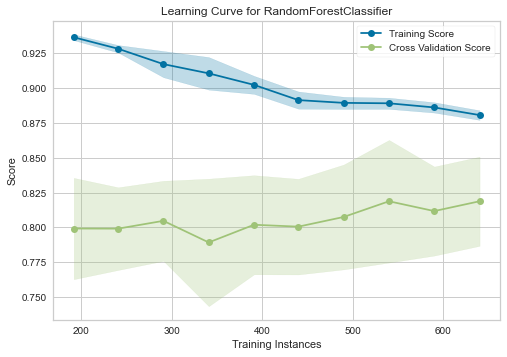

In [73]:
plot_model(tuned_model,"learning")